In [248]:
# %cd /Users/alina/Library/Containers/com.apple.STMFramework.UIHelper/Data/Documents/Python/PROJECTS/GitHub/Gapminder/Gapminder_data

In [250]:
# Import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [252]:
regions = pd.read_csv(r'Gapminder_data/regions.csv')

regions = regions[['name', 'four_regions', 'World bank, 4 income groups 2017']]
regions.columns = ['country', 'region', 'income_group']

# Clean region data

regions.income_group.replace({'Low income':'low_income', 'Upper middle income':'upper_middle_income', "High income": 'high_income', 'Lower middle income':'lower_middle_income'}, inplace = True)

# Create Oceanian countries region
list_oceania = ['Papua New Guinea', 'New Zealand', 'Fiji', 'Solomon Islands', 'Vanuatu', 'Samoa', 'Kiribati', 'Micronesia','Tonga', 'Palau', 'Marshall Islands', 'Fed. Sts.', 'Nauru', 'Tuvalu', 'Australia']

for country in list_oceania:
    regions.loc[regions['country'] == country, ['region']] = 'Oceania'

# Divide Americas by two regions: "South America" and "North America"
list_north_america = ['Canada', 'United States', 'Mexico']

for country in list_north_america:
    regions.loc[regions['country'] == country, ['region']] = 'North_America'

regions.loc[regions['region'] == 'americas', ['region']] = 'South_America'

#Capitalize region names
regions['region'] = regions['region'].str.capitalize()

regions.tail(2)

,country,region,income_group
195,Zimbabwe,Africa,low_income
196,South Sudan,Africa,low_income


In [254]:
kids_df = pd.read_csv(r'Gapminder_data/kids_per_woman.csv')
kids_df.columns=kids_df.columns.map(lambda x : 'kids_'+x if x !='country' else x)
kids_df = pd.merge(regions, kids_df, on = 'country')
kids_df.tail(2)

,country,region,income_group,kids_1800,kids_1801,kids_1802,kids_1803,kids_1804,kids_1805,kids_1806,...,kids_2091,kids_2092,kids_2093,kids_2094,kids_2095,kids_2096,kids_2097,kids_2098,kids_2099,kids_2100
181,Zimbabwe,Africa,low_income,6.75,6.75,6.75,6.75,6.75,6.75,6.75,...,1.85,1.85,1.85,1.84,1.84,1.84,1.83,1.83,1.83,1.83
182,South Sudan,Africa,low_income,6.64,6.64,6.64,6.64,6.64,6.64,6.64,...,2.11,2.10,2.08,2.07,2.06,2.05,2.04,2.03,2.02,2.02


In [256]:
life_exp = pd.read_csv(r'Gapminder_data/life_expectancy_years.csv')
life_exp.columns = life_exp.columns.map(lambda x : 'life_exp_'+x if x !='country' else x)
life_exp.head(2)

,country,life_exp_1800,life_exp_1801,life_exp_1802,life_exp_1803,life_exp_1804,life_exp_1805,life_exp_1806,life_exp_1807,life_exp_1808,...,life_exp_2091,life_exp_2092,life_exp_2093,life_exp_2094,life_exp_2095,life_exp_2096,life_exp_2097,life_exp_2098,life_exp_2099,life_exp_2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3


In [258]:
ch_mort = pd.read_csv(r'Gapminder_data/child_mortality_0_5.csv')
ch_mort.columns = ch_mort.columns.map(lambda x : 'ch_mort_'+x if x != 'country' else x)
ch_mort.head(2)

,country,ch_mort_1800,ch_mort_1801,ch_mort_1802,ch_mort_1803,ch_mort_1804,ch_mort_1805,ch_mort_1806,ch_mort_1807,ch_mort_1808,...,ch_mort_2091,ch_mort_2092,ch_mort_2093,ch_mort_2094,ch_mort_2095,ch_mort_2096,ch_mort_2097,ch_mort_2098,ch_mort_2099,ch_mort_2100
0,Afghanistan,469.0,469.0,469.0,469.0,469.0,469.0,470.0,470.0,470.0,...,12.60,12.4,12.20,12.00,11.80,11.60,11.50,11.30,11.10,11.10
1,Albania,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,375.0,...,2.32,2.3,2.27,2.24,2.22,2.19,2.16,2.14,2.11,2.11


In [260]:
inc = pd.read_csv('Gapminder_data/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
inc.columns = inc.columns.map(lambda x: 'income_' + x if x != 'country' else x)
inc.head(2)

,country,income_1800,income_1801,income_1802,income_1803,income_1804,income_1805,income_1806,income_1807,income_1808,...,income_2031,income_2032,income_2033,income_2034,income_2035,income_2036,income_2037,income_2038,income_2039,income_2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300


In [261]:
#Creating merged data frame for the last century
kids_trends = kids_df[['country','region','income_group', 'kids_1900', 'kids_1920', 'kids_1940', 'kids_1960', 'kids_1980', 'kids_2000', 'kids_2020']]
ch_mort_trends = ch_mort[['country', 'ch_mort_1900', 'ch_mort_1920', 'ch_mort_1940', 'ch_mort_1960', 'ch_mort_1980', 'ch_mort_2000', 'ch_mort_2020']]
life_exp_trends = life_exp[['country', 'life_exp_1900', 'life_exp_1920', 'life_exp_1940', 'life_exp_1960', 'life_exp_1980', 'life_exp_2000', 'life_exp_2020']]
income_trends = inc[['country', 'income_1900', 'income_1920', 'income_1940', 'income_1960', 'income_1980', 'income_2000', 'income_2020']]

trends_df = pd.merge(kids_trends, ch_mort_trends, on = 'country')
trends_df = pd.merge(trends_df, life_exp_trends, on = 'country')
trends_df = pd.merge(trends_df, income_trends, on = 'country')

trends_df.head()

,country,region,income_group,kids_1900,kids_1920,kids_1940,kids_1960,kids_1980,kids_2000,kids_2020,...,life_exp_1980,life_exp_2000,life_exp_2020,income_1900,income_1920,income_1940,income_1960,income_1980,income_2000,income_2020
0,Afghanistan,Asia,low_income,7.00,7.00,7.38,7.45,7.45,7.49,4.04,...,44.1,54.6,64.4,1090,1490,2060,2740,2020,687,1800
1,Albania,Europe,upper_middle_income,4.60,4.60,4.21,6.49,3.62,2.16,1.70,...,71.7,74.9,78.6,1220,1530,1720,2590,4190,5440,13200
2,Algeria,Africa,upper_middle_income,6.99,6.99,7.35,7.52,6.79,2.51,2.54,...,62.8,74.0,78.3,1750,2360,3780,8080,11200,10300,14000
3,Angola,Africa,lower_middle_income,7.00,7.02,7.01,7.48,7.50,6.64,5.41,...,47.6,51.7,65.4,958,1250,2330,3860,5110,3890,5440
4,Antigua and Barbuda,South_america,high_income,4.63,4.56,4.48,4.43,2.12,2.32,2.01,...,71.1,74.7,77.4,1300,1680,2730,4420,8560,20800,25000


In [264]:
regions = trends_df.groupby('region').mean()
regions.index.names = ['']
regions = regions.round(1)
regions

,kids_1900,kids_1920,kids_1940,kids_1960,kids_1980,kids_2000,kids_2020,ch_mort_1900,ch_mort_1920,ch_mort_1940,...,life_exp_1980,life_exp_2000,life_exp_2020,income_1900,income_1920,income_1940,income_1960,income_1980,income_2000,income_2020
,,,,,,,,,,,,,,,,,,,,,
Africa,6.4,6.4,6.4,6.6,6.6,5.2,4.1,428.4,410.4,371.5,...,54.9,56.6,66.4,921.9,1092.8,1443.6,2133.2,3906.0,4050.6,5572.4
Asia,6.3,6.3,6.2,6.3,5.3,3.3,2.4,434.2,399.1,318.4,...,62.5,69.1,74.9,1474.7,1623.8,2511.9,6658.0,20436.8,18064.0,21985.7
Europe,5.0,4.2,3.2,3.0,2.2,1.5,1.6,298.3,233.3,152.9,...,71.8,74.9,79.1,3309.7,3536.7,5248.6,8640.2,17564.4,23802.3,34273.3
North_america,4.9,4.2,3.6,4.8,2.8,2.1,1.8,337.3,279.0,147.2,...,72.0,76.9,78.9,4446.7,6020.0,7810.0,12840.0,23266.7,33100.0,40033.3
Oceania,5.8,5.6,5.6,6.1,4.8,3.7,3.0,297.2,268.9,223.8,...,65.0,67.4,70.6,2298.3,2810.3,3534.9,5116.7,7247.8,9818.9,12931.1
South_america,5.9,5.8,5.6,6.0,4.2,2.8,2.1,383.6,332.5,240.1,...,67.7,72.5,75.8,1892.2,2352.7,3201.3,4957.7,8159.7,10032.7,13679.7


In [265]:
pop = pd.read_csv(r'Gapminder_data/population_total.csv')
pop.head(2)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,76600000,76400000,76300000,76100000,76000000,75800000,75600000,75400000,75200000,74900000
1,Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,...,1330000,1300000,1270000,1250000,1220000,1190000,1170000,1140000,1110000,1090000


In [266]:
year_2020 = trends_df[['country','region','income_group', 'kids_2020']]
year_2020.head()

,country,region,income_group,kids_2020
0,Afghanistan,Asia,low_income,4.04
1,Albania,Europe,upper_middle_income,1.70
2,Algeria,Africa,upper_middle_income,2.54
3,Angola,Africa,lower_middle_income,5.41
4,Antigua and Barbuda,South_america,high_income,2.01


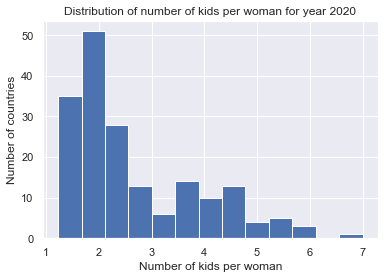

In [267]:
sns.set()
# Compute number of data points: n_data
n_data = len(year_2020)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
plt.hist(year_2020['kids_2020'], bins = n_bins)

# Label axes
_ = plt.xlabel('Number of kids per woman')
_ = plt.ylabel('Number of countries')

# _ = plt.legend()
_ = plt.title('Distribution of number of kids per woman for year 2020')
plt.show()

In [268]:
trends_df.head(2)

,country,region,income_group,kids_1900,kids_1920,kids_1940,kids_1960,kids_1980,kids_2000,kids_2020,...,life_exp_1980,life_exp_2000,life_exp_2020,income_1900,income_1920,income_1940,income_1960,income_1980,income_2000,income_2020
0,Afghanistan,Asia,low_income,7.0,7.0,7.38,7.45,7.45,7.49,4.04,...,44.1,54.6,64.4,1090,1490,2060,2740,2020,687,1800
1,Albania,Europe,upper_middle_income,4.6,4.6,4.21,6.49,3.62,2.16,1.70,...,71.7,74.9,78.6,1220,1530,1720,2590,4190,5440,13200


In [269]:
### Year trends
century_trends = kids_df[['country','region','kids_1900','kids_1920','kids_1940','kids_1960','kids_1980','kids_2000','kids_2020']]

century_trends = century_trends.groupby('region').mean()
century_trends.index.names = ['']
century_trends.columns = ['1900', '1920', '1940', '1960', '1980', '2000', '2020']

century_trends = century_trends.transpose()
century_trends.head()

,Africa,Asia,Europe,North_america,Oceania,South_america
1900,6.397778,6.286364,5.021860,4.896667,5.772222,5.878667
1920,6.387593,6.254091,4.245814,4.220000,5.575556,5.810333
1940,6.375556,6.222955,3.190698,3.600000,5.602222,5.589333
1960,6.612222,6.298409,3.033256,4.773333,6.123333,6.024000
1980,6.580370,5.251136,2.150698,2.776667,4.755556,4.196333


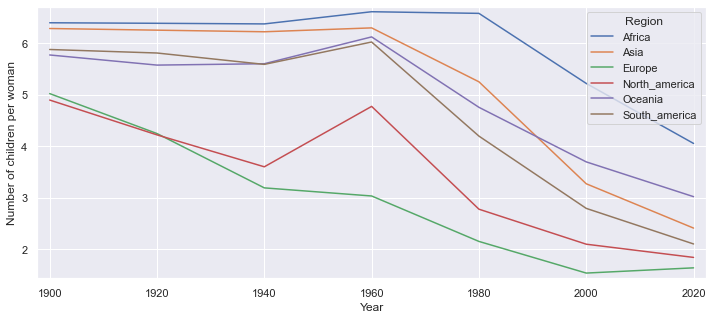

In [270]:
# Plotting timeseries of trends
fig, ax = plt.subplots(figsize=(12,5))

# Plot all trends on the same plot
_ = plt.plot(century_trends)

# Annotate the plot
plt.legend(title = "Region", labels = century_trends.columns, loc = 'upper right')
_ = plt.xlabel('Year')
_ = plt.ylabel('Number of children per woman')

plt.margins(0.02)
plt.show()

In [271]:
year_2020.head(2)

,country,region,income_group,kids_2020
0,Afghanistan,Asia,low_income,4.04
1,Albania,Europe,upper_middle_income,1.70


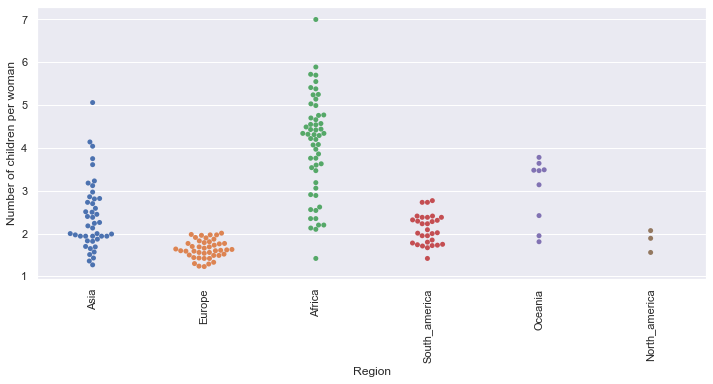

In [272]:
fig, ax = plt.subplots(figsize=(12,5))

_ = sns.swarmplot(x = 'region', y = 'kids_2020', data = year_2020)

_ = plt.xlabel('Region')
_ = plt.ylabel('Number of children per woman')

_ = plt.xticks(rotation = 90)

plt.show()

#Fertility of Africa region tends to be the biggest and with the broader range.

In [273]:
# ECDF function

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

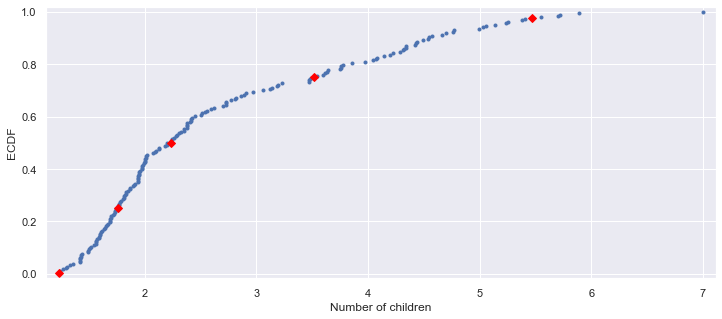

In [274]:
# ECDF plotting
fig, ax = plt.subplots(figsize=(12,5))

x, y = ecdf(year_2020['kids_2020'])

_ = plt.plot(x, y, marker = '.', linestyle = 'none')
_ = plt.xlabel('Number of children')
_ = plt.ylabel('ECDF')

percentiles = np.array([0.25, 25, 50, 75, 97.5])
perc_2020 = np.percentile(year_2020['kids_2020'], percentiles)

# Overlay percentiles as red diamonds.
_ = plt.plot(perc_2020, percentiles/100, marker='D', color='red',
         linestyle='none')

plt.margins(0.02)
plt.show()

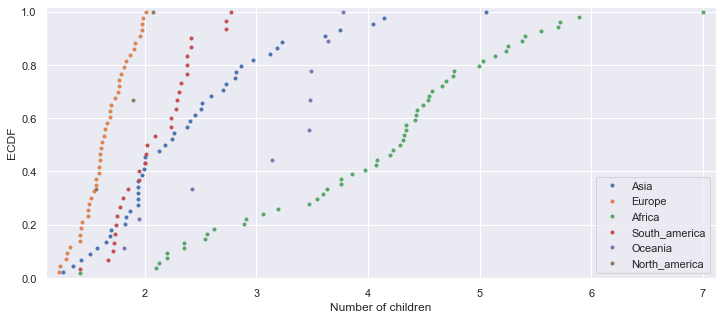

In [275]:
# Plotting ECDF
fig, ax = plt.subplots(figsize=(12,5))

regions_list = year_2020['region'].unique()

# Plot all ECDFs on the same plot
for region in regions_list:
    data = year_2020[year_2020['region'] == region]['kids_2020']
    x, y = ecdf(data)
    _ = plt.plot(x, y, marker = '.', linestyle = 'none', label = region)

# Annotate the plot
plt.legend(loc = 'lower right')
_ = plt.xlabel('Number of children')
_ = plt.ylabel('ECDF')

plt.margins(0.02)
plt.show()

#The ECDFs expose clear differences among the fertility rate in different regions. Sub_Saharan Africa region shows much bigger fertility rate in comparison to regions, also with less absolute variability in pnumber of kids in Europe $ Central Asia and Latin America&Caribbean and North America regions.

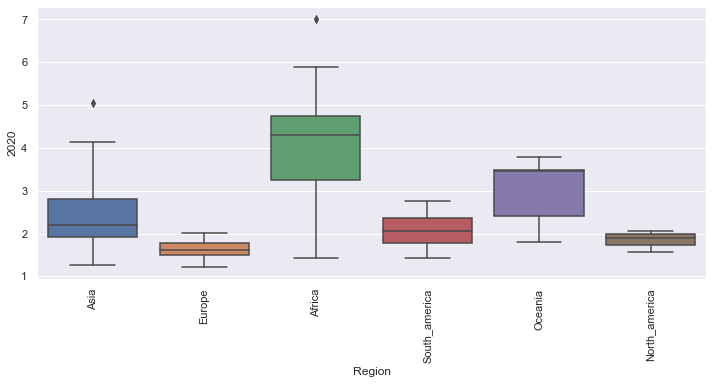

In [276]:
fig, ax = plt.subplots(figsize=(12,5))

_ = sns.boxplot(x = 'region', y = 'kids_2020', data = year_2020)

_ = plt.xlabel('Region')
_ = plt.ylabel('2020')
_ = plt.xticks(rotation = 90)

plt.show()

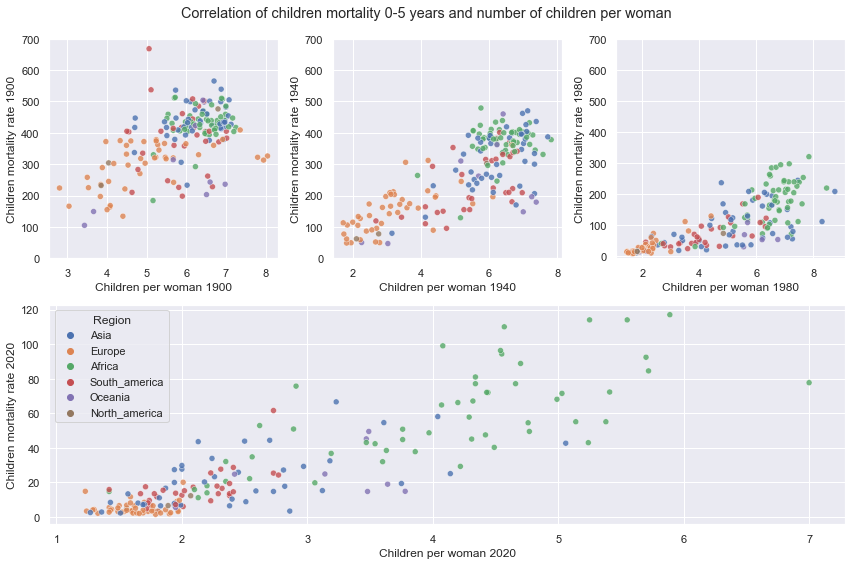

In [277]:
fig, axes = plt.subplots(figsize = (12,8), sharey = True)
fig.suptitle('Correlation of children mortality 0-5 years and number of children per woman')
sns.set()

plt.subplot(231)
y_1900 = sns.scatterplot(x = 'kids_1900', y = 'ch_mort_1900', hue = 'region', data = trends_df,  alpha = 0.8, legend = False)
plt.xlabel('Children per woman 1900')
plt.ylabel('Children mortality rate 1900')
plt.yticks([0, 100, 200, 300, 400, 500, 600, 700])

plt.subplot(232)
y_1940 = sns.scatterplot(x = 'kids_1940', y = 'ch_mort_1940', hue = 'region', data = trends_df,  alpha = 0.8, legend = False)
plt.xlabel('Children per woman 1940')
plt.ylabel('Children mortality rate 1940')
plt.yticks([0, 100, 200, 300, 400, 500, 600, 700])

plt.subplot(233)
y_1980 = sns.scatterplot(x = 'kids_1980', y = 'ch_mort_1980', hue = 'region', data = trends_df,  alpha = 0.8, legend = False)
plt.xlabel('Children per woman 1980')
plt.ylabel('Children mortality rate 1980')
plt.yticks([0, 100, 200, 300, 400, 500, 600, 700])

plt.subplot(212)
y_2020 = sns.scatterplot(x = 'kids_2020', y = 'ch_mort_2020', hue = 'region', data = trends_df,  alpha = 0.8)
plt.xlabel('Children per woman 2020')
plt.ylabel('Children mortality rate 2020')
plt.legend(title = 'Region')
# plt.yticks([0, 100, 200, 300, 400, 500, 600, 700])

plt.tight_layout()
plt.show()

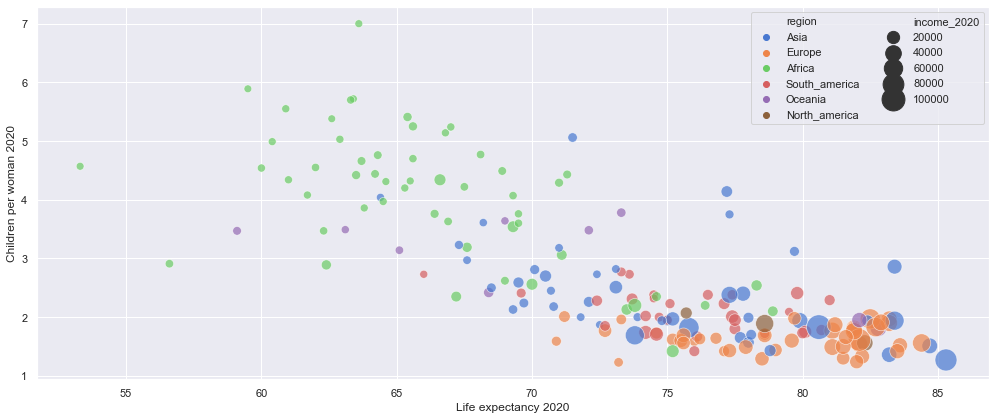

In [278]:
fig = plt.figure(figsize=(14,6))
sns.set()

g = sns.scatterplot('life_exp_2020', 'kids_2020', hue = 'region', size = 'income_2020', sizes=(60, 600), alpha = 0.7, data = trends_df, palette="muted", legend = True)

plt.xlabel('Life expectancy 2020')
plt.ylabel('Children per woman 2020')

# h,l = g.get_legend_handles_labels()
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol = 2)

plt.legend(loc='upper right', ncol = 2)

plt.tight_layout()
plt.savefig('kids_life_exp_2020.jpg')

plt.show()

In [279]:
# Pearson corr function
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

In [280]:
# Compute Pearson correlation
r = pearson_r(trends_df['kids_2020'], trends_df['life_exp_2020'])
print(r)

-0.7779785319571607


In [281]:
# Compute Pearson correlation
r = pearson_r(trends_df['life_exp_2020'], trends_df['income_2020'])
print(r)

0.6834477410809363


In [282]:
# Compute Pearson correlation
r = pearson_r(trends_df['kids_2020'], trends_df['income_2020'])
print(r)

-0.5462756449404138


In [283]:
# Compute Pearson correlation
r = pearson_r(trends_df['ch_mort_2020'], trends_df['kids_2020'])
print(r)

0.8598370398781572
